#  <h1 style="color:#6a2016"> Librerias </h1>

In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
from libreria import *
pd.set_option("display.max_columns",200)
import warnings
warnings.filterwarnings("ignore")

***
#  <h1 style="color:#6a2016;text-align: center"> Dataset </h1>
***

In [2]:
df=pd.read_excel("../data/Desarrollo en áreas Tech (respuestas).xlsx")

In [3]:
df.shape

(135, 74)

In [89]:
df1=df[df["Género"]=="Ella"]
df2=df[df["Género"]!="Ella"]

In [90]:
df1=df1.drop(columns=[x for x in df1.columns if ".1" in x])

In [91]:
comple=completitud(df2)
df2=df2.drop(columns=list(comple[comple["completitud"]==0]["columna"].values))

In [92]:
df1

,Marca temporal,Edad,Género,Puesto,Años de experiencia en la industria tech,Salario bruto actual (mensual),Nivel de estudios,Sector,"Número de certificaciones (Considerando : Idiomas, computo en la nube, programación, gestión de proyectos,etc.)\n",Antiguedad en tu trabajo actual (años),Tecnologias que manejas y/o nivel [Python],Tecnologias que manejas y/o nivel [R],Tecnologias que manejas y/o nivel [SQL],Tecnologias que manejas y/o nivel [Azure],Tecnologias que manejas y/o nivel [GCP],Tecnologias que manejas y/o nivel [AWS],Tecnologias que manejas y/o nivel [Excel],Tecnologias que manejas y/o nivel [Tableau],Tecnologias que manejas y/o nivel [Power Bi],Tecnologias que manejas y/o nivel [Looker],Tecnologias que manejas y/o nivel [VBA],Tecnologias que manejas y/o nivel [Tensorflow],Tecnologias que manejas y/o nivel [Pytorch],Habilidades que dominas [Inglés],Habilidades que dominas [Gestión de proyectos],Habilidades que dominas [Liderazgo],Habilidades que dominas [Comunicación],Habilidades que dominas [Administración del tiempo],Habilidades que dominas [Resolución de problemas],Habilidades que dominas [Trabajo en equipo],Habilidades que dominas [Solución de conflictos],Cuéntanos ¿Por qué entraste al área tech?,Ascensos salariales recibidos en tu último empleo,¿Alguna vez luchas con la confianza?,¿Crees que tu empresa actual tiene iniciativas para el desarrollo profesional de las mujeres?,¿ Crees que es importante que más mujeres se unan a la industria tecnológica?,Si respondiste SI en la pregunta anterior: \n¿Por qué?,¿Has sentido un trato diferente en relación con tus pares?,"Si respondiste ""SI"" en la pregunta anterior: \n¿En qué situaciones?",¿Qué consejo le darías a las mujeres que ingresan al campo de la tecnología?,Has sentido un sesgo de género en la fase de reclutamiento,"Si respondiste ""SI"" en la pregunta anterior: \nCuéntanos más acerca de tu experiencia en la fase de reclutamiento",¿Cómo crees que se puede combatir los sesgos en la industria tecnológica?,¿Algo que desearías haber sabido antes de comenzar tu carrera en el campo tech?
0,2023-03-25 13:22:43.713,34,Ella,Data Scientist,9.0,81-90K,Licenciatura,Finanzas y económico,3,Menos 1 año,Medio,Bajo,Alto,Medio,Alto,Nulo,Alto,Medio,Medio,Medio,Bajo,Bajo,Bajo,Medio,Alto,Alto,Alto,Alto,Alto,Alto,Alto,Por un profesor,0.0,No,Si,Si,Son un buen complemento en el trabajo porque t...,No,NaN,Que desarrollen fuertemente sus habilidades té...,No,NaN,Fortaleciendo técnicamente a las mujeres en pr...,Que debí empezar a programar en la infancia
1,2023-03-25 13:27:58.625,28,Ella,Especialista de datos JR,0.5,31-40K,Licenciatura,Finanzas y económico,2,Menos 1 año,Bajo,Medio,Medio,Medio,Bajo,Bajo,Alto,Nulo,Nulo,Nulo,Nulo,Nulo,Nulo,Alto,Medio,Medio,Medio,Alto,Alto,Alto,Alto,Coincidencia,1.0,Sí,Si,Si,"Porque las mujeres hacen gran equipo, son más ...",No,NaN,Es una posición como cualquier otra,No,NaN,No teniendo prejuicios y dando oportunidades,Todo error se puede remediar
4,2023-03-25 13:30:50.955,23,Ella,Data Analyst,1.0,31-40K,Licenciatura,Finanzas y económico,3,2,Medio,Nulo,Medio,Bajo,Nulo,Bajo,Medio,Bajo,Nulo,Nulo,Nulo,Bajo,Bajo,Medio,Bajo,Bajo,Medio,Bajo,Medio,Medio,Medio,Es una área donde puedes encontrar muchas resp...,1.0,Sí,Si,Si,"Porque damos ideas maravillosas, y somos muy b...",No,NaN,Certifíquense y no tengan miedo,No,NaN,Creo que todo se basa en los heads que liderea...,Más manejo de datos
8,2023-03-25 13:31:32.109,33,Ella,Data Analyst,3.0,51-60K,Licenciatura,Finanzas y económico,3,7,Medio,Medio,Medio,Nulo,Nulo,Nulo,Alto,Bajo,Bajo,Nulo,Medio,Nulo,Nulo,Medio,Bajo,Medio,Alto,Medio,Alto,Medio,Alto,"Me gusta mucho la parte de la programación, la...",7.0,Sí,Si,Si,Por qué tenemos claramente la capacidad de hac...,Si,"Aplican la de ""mansplaining"" lo cual resulta i...",Que confíen en sus habilidades y levanten la v...,No,NaN,Demostrando las habilidades y ampliando el lug...,Tener una formación más práctica.
10,2023-03-25 13:31:42.479,24,Ella,Data Engineer,1.0,21-30K,"Licenciatu

In [93]:
df2.columns=[x.replace(".1","") for x in df2.columns]

In [94]:
df=pd.concat([df1.reset_index(drop=True),df2.reset_index(drop=True)])

In [95]:
df=df.drop(columns=["Marca temporal"])

In [96]:
tec_features=[x.split("[")[-1].replace("]","") for x in df.columns if "Tecnologias" in x]
hab_features=[x.split("[")[-1].replace("]","") for x in df.columns if "Habilidades" in x]

In [97]:
df=df.rename(columns=dict(zip([x for x in df.columns if "Tecnologias" in x],[x.split("[")[-1].replace("]","") for x in df.columns if "Tecnologias" in x])))
df=df.rename(columns=dict(zip([x for x in df.columns if "Habilidades" in x],[x.split("[")[-1].replace("]","") for x in df.columns if "Habilidades" in x])))

In [98]:
["v_"+x.lower() for x in hab_features]

['v_inglés',
 'v_gestión de proyectos',
 'v_liderazgo',
 'v_comunicación',
 'v_administración del tiempo',
 'v_resolución de problemas',
 'v_trabajo en equipo',
 'v_solución de conflictos']

In [99]:
'v_inglés','v_gestión de proyectos','v_liderazgo','v_comunicación','v_administración del tiempo','v_resolución de problemas','v_trabajo en equipo','v_solución de conflictos'

('v_inglés',
 'v_gestión de proyectos',
 'v_liderazgo',
 'v_comunicación',
 'v_administración del tiempo',
 'v_resolución de problemas',
 'v_trabajo en equipo',
 'v_solución de conflictos')

In [100]:
df.columns=["c_edad","v_genero","v_puesto","c_experiencia","tgt_salario","v_estudios","v_sector","c_certificaciones","c_antiguedad",'v_python','v_r','v_sql','v_azure','v_gcp','v_aws','v_excel','v_tableau','v_power bi','v_looker','v_vba','v_tensorflow','v_pytorch','v_inglés','v_gestión de proyectos','v_liderazgo','v_comunicación','v_administración del tiempo','v_resolución de problemas','v_trabajo en equipo','v_solución de conflictos',"t_porque_area_tech","c_ascensos","v_confianza","v_iniciativas_en_tu_empresa","v_importante_m_industria","t_importante_m_industria_porque","v_trato_dif_pares","t_trato_dif_pares_porque","t_consejo_mujeres","v_sesgo_genero_reclutamiento","t_sesgo_genero_reclutamiento_exp","t_como_combatir_sesgo","t_algo_desearias_saber_comenzar"]

In [101]:
df

,c_edad,v_genero,v_puesto,c_experiencia,tgt_salario,v_estudios,v_sector,c_certificaciones,c_antiguedad,v_python,v_r,v_sql,v_azure,v_gcp,v_aws,v_excel,v_tableau,v_power bi,v_looker,v_vba,v_tensorflow,v_pytorch,v_inglés,v_gestión de proyectos,v_liderazgo,v_comunicación,v_administración del tiempo,v_resolución de problemas,v_trabajo en equipo,v_solución de conflictos,t_porque_area_tech,c_ascensos,v_confianza,v_iniciativas_en_tu_empresa,v_importante_m_industria,t_importante_m_industria_porque,v_trato_dif_pares,t_trato_dif_pares_porque,t_consejo_mujeres,v_sesgo_genero_reclutamiento,t_sesgo_genero_reclutamiento_exp,t_como_combatir_sesgo,t_algo_desearias_saber_comenzar
0,34,Ella,Data Scientist,9.0,81-90K,Licenciatura,Finanzas y económico,3,Menos 1 año,Medio,Bajo,Alto,Medio,Alto,Nulo,Alto,Medio,Medio,Medio,Bajo,Bajo,Bajo,Medio,Alto,Alto,Alto,Alto,Alto,Alto,Alto,Por un profesor,0.0,No,Si,Si,Son un buen complemento en el trabajo porque t...,No,NaN,Que desarrollen fuertemente sus habilidades té...,No,NaN,Fortaleciendo técnicamente a las mujeres en pr...,Que debí empezar a programar en la infancia
1,28,Ella,Especialista de datos JR,0.5,31-40K,Licenciatura,Finanzas y económico,2,Menos 1 año,Bajo,Medio,Medio,Medio,Bajo,Bajo,Alto,Nulo,Nulo,Nulo,Nulo,Nulo,Nulo,Alto,Medio,Medio,Medio,Alto,Alto,Alto,Alto,Coincidencia,1.0,Sí,Si,Si,"Porque las mujeres hacen gran equipo, son más ...",No,NaN,Es una posición como cualquier otra,No,NaN,No teniendo prejuicios y dando oportunidades,Todo error se puede remediar
2,23,Ella,Data Analyst,1.0,31-40K,Licenciatura,Finanzas y económico,3,2,Medio,Nulo,Medio,Bajo,Nulo,Bajo,Medio,Bajo,Nulo,Nulo,Nulo,Bajo,Bajo,Medio,Bajo,Bajo,Medio,Bajo,Medio,Medio,Medio,Es una área donde puedes encontrar muchas resp...,1.0,Sí,Si,Si,"Porque damos ideas maravillosas, y somos muy b...",No,NaN,Certifíquense y no tengan miedo,No,NaN,Creo que todo se basa en los heads que liderea...,Más manejo de datos
3,33,Ella,Data Analyst,3.0,51-60K,Licenciatura,Finanzas y económico,3,7,Medio,Medio,Medio,Nulo,Nulo,Nulo,Alto,Bajo,Bajo,Nulo,Medio,Nulo,Nulo,Medio,Bajo,Medio,Alto,Medio,Alto,Medio,Alto,"Me gusta mucho la parte de la programación, la...",7.0,Sí,Si,Si,Por qué tenemos claramente la capacidad de hac...,Si,"Aplican la de ""mansplaining"" lo cual resulta i...",Que confíen en sus habilidades y levanten la v...,No,NaN,Demostrando las habilidades y ampliando el lug...,Tener una formación más práctica.
4,24,Ella,Data Engineer,1.0,21-30K,"Licenciatura, Diplomado",Informática y tecnología,2,Menos 1 año,Medio,Medio,Alto,Nulo,Nulo,Medio,Medio,Bajo,Bajo,Bajo,Alto,Bajo,Nulo,Medio,Nulo,Medio,Medio,Medio,Medio,Medio,Medio,Me llamo la atención los proyectos que manejan,0.0,Sí,Si,Si,Es un sector donde predominan los hombres pero...,No,NaN,Que no tengan miedo.,No,NaN,Dando a conocer la oferta y campo laboral que ...,Tener confianza en mis conocimientos
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86,24,El,Fullstack,2.0,11-20K,Licenciatura,Informática y tecnología,2,2,Bajo,Nulo,Medio,Bajo,Bajo,Nulo,Bajo,Nulo,Nulo,Nulo,Bajo,Nulo,Nulo,Bajo,Medio,Bajo,Medio,Medio,Medio,Nulo,Medio,Por elección propia,1.0,Sí,Si,NaN,NaN,No,NaN,NaN,No,NaN,NaN,Finanzas e impuestos\n
87,50,El,Data Engineer,24.0,31-40K,Maestria,Informática y tecnología,3,Menos 1 año,Medio,Nulo,Alto,Bajo,Medio,Nulo,Medio,Bajo,Nulo,Bajo,Bajo,Nulo,Nulo,Medio,Bajo,Bajo,Medio,Medio,Medio,Alto,Medio,Siempre me gustaron las computadoras y me sigu...,1.0,No,Si,NaN,NaN,No,-,NaN,No,-,NaN,"Sobre los horarios, sobre la ergonomia y riesg..."
88,37,El,Data Scientist,12.0,71-80K,Maestria,Finanzas y económico,4,10,Bajo,Medio,Bajo,Nulo,Nulo,Nulo,Alto,Bajo,Medio,Nulo,Alto,Nulo,Nulo,Alto,Medio,Medio,Medio,Alto,Alto,Bajo,Medio,Siempre deseé dedicarme a esta área. desde niñ...,7.0,Sí,Si,NaN,NaN,Si,"Por amistad y compadrazgo, existe una gran dif...",NaN,Si,"Por la discriminación positiva actual, 

In [102]:
df.shape

(135, 43)

***
#  <h1 style="color:#6a2016;text-align: center;"> Exploratory Data Analysis & Data Cleaning </h1>

***

- Trazado de gráficos de barras y gráficos de conteo para características numéricas y categóricas, respectivamente.
- Eliminar columnas no deseadas
- Manejo de NaN/valores faltantes
- Eliminación de caracteres alfabéticos/especiales no deseados de las funciones

##  <h1 style="color:#434b4d"> Completitud </h1>  

In [103]:
df

,c_edad,v_genero,v_puesto,c_experiencia,tgt_salario,v_estudios,v_sector,c_certificaciones,c_antiguedad,v_python,v_r,v_sql,v_azure,v_gcp,v_aws,v_excel,v_tableau,v_power bi,v_looker,v_vba,v_tensorflow,v_pytorch,v_inglés,v_gestión de proyectos,v_liderazgo,v_comunicación,v_administración del tiempo,v_resolución de problemas,v_trabajo en equipo,v_solución de conflictos,t_porque_area_tech,c_ascensos,v_confianza,v_iniciativas_en_tu_empresa,v_importante_m_industria,t_importante_m_industria_porque,v_trato_dif_pares,t_trato_dif_pares_porque,t_consejo_mujeres,v_sesgo_genero_reclutamiento,t_sesgo_genero_reclutamiento_exp,t_como_combatir_sesgo,t_algo_desearias_saber_comenzar
0,34,Ella,Data Scientist,9.0,81-90K,Licenciatura,Finanzas y económico,3,Menos 1 año,Medio,Bajo,Alto,Medio,Alto,Nulo,Alto,Medio,Medio,Medio,Bajo,Bajo,Bajo,Medio,Alto,Alto,Alto,Alto,Alto,Alto,Alto,Por un profesor,0.0,No,Si,Si,Son un buen complemento en el trabajo porque t...,No,NaN,Que desarrollen fuertemente sus habilidades té...,No,NaN,Fortaleciendo técnicamente a las mujeres en pr...,Que debí empezar a programar en la infancia
1,28,Ella,Especialista de datos JR,0.5,31-40K,Licenciatura,Finanzas y económico,2,Menos 1 año,Bajo,Medio,Medio,Medio,Bajo,Bajo,Alto,Nulo,Nulo,Nulo,Nulo,Nulo,Nulo,Alto,Medio,Medio,Medio,Alto,Alto,Alto,Alto,Coincidencia,1.0,Sí,Si,Si,"Porque las mujeres hacen gran equipo, son más ...",No,NaN,Es una posición como cualquier otra,No,NaN,No teniendo prejuicios y dando oportunidades,Todo error se puede remediar
2,23,Ella,Data Analyst,1.0,31-40K,Licenciatura,Finanzas y económico,3,2,Medio,Nulo,Medio,Bajo,Nulo,Bajo,Medio,Bajo,Nulo,Nulo,Nulo,Bajo,Bajo,Medio,Bajo,Bajo,Medio,Bajo,Medio,Medio,Medio,Es una área donde puedes encontrar muchas resp...,1.0,Sí,Si,Si,"Porque damos ideas maravillosas, y somos muy b...",No,NaN,Certifíquense y no tengan miedo,No,NaN,Creo que todo se basa en los heads que liderea...,Más manejo de datos
3,33,Ella,Data Analyst,3.0,51-60K,Licenciatura,Finanzas y económico,3,7,Medio,Medio,Medio,Nulo,Nulo,Nulo,Alto,Bajo,Bajo,Nulo,Medio,Nulo,Nulo,Medio,Bajo,Medio,Alto,Medio,Alto,Medio,Alto,"Me gusta mucho la parte de la programación, la...",7.0,Sí,Si,Si,Por qué tenemos claramente la capacidad de hac...,Si,"Aplican la de ""mansplaining"" lo cual resulta i...",Que confíen en sus habilidades y levanten la v...,No,NaN,Demostrando las habilidades y ampliando el lug...,Tener una formación más práctica.
4,24,Ella,Data Engineer,1.0,21-30K,"Licenciatura, Diplomado",Informática y tecnología,2,Menos 1 año,Medio,Medio,Alto,Nulo,Nulo,Medio,Medio,Bajo,Bajo,Bajo,Alto,Bajo,Nulo,Medio,Nulo,Medio,Medio,Medio,Medio,Medio,Medio,Me llamo la atención los proyectos que manejan,0.0,Sí,Si,Si,Es un sector donde predominan los hombres pero...,No,NaN,Que no tengan miedo.,No,NaN,Dando a conocer la oferta y campo laboral que ...,Tener confianza en mis conocimientos
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86,24,El,Fullstack,2.0,11-20K,Licenciatura,Informática y tecnología,2,2,Bajo,Nulo,Medio,Bajo,Bajo,Nulo,Bajo,Nulo,Nulo,Nulo,Bajo,Nulo,Nulo,Bajo,Medio,Bajo,Medio,Medio,Medio,Nulo,Medio,Por elección propia,1.0,Sí,Si,NaN,NaN,No,NaN,NaN,No,NaN,NaN,Finanzas e impuestos\n
87,50,El,Data Engineer,24.0,31-40K,Maestria,Informática y tecnología,3,Menos 1 año,Medio,Nulo,Alto,Bajo,Medio,Nulo,Medio,Bajo,Nulo,Bajo,Bajo,Nulo,Nulo,Medio,Bajo,Bajo,Medio,Medio,Medio,Alto,Medio,Siempre me gustaron las computadoras y me sigu...,1.0,No,Si,NaN,NaN,No,-,NaN,No,-,NaN,"Sobre los horarios, sobre la ergonomia y riesg..."
88,37,El,Data Scientist,12.0,71-80K,Maestria,Finanzas y económico,4,10,Bajo,Medio,Bajo,Nulo,Nulo,Nulo,Alto,Bajo,Medio,Nulo,Alto,Nulo,Nulo,Alto,Medio,Medio,Medio,Alto,Alto,Bajo,Medio,Siempre deseé dedicarme a esta área. desde niñ...,7.0,Sí,Si,NaN,NaN,Si,"Por amistad y compadrazgo, existe una gran dif...",NaN,Si,"Por la discriminación positiva actual, 

In [104]:
completitud(df)

,columna,total,completitud
0,t_trato_dif_pares_porque,109,19.259259
1,t_sesgo_genero_reclutamiento_exp,108,20.000000
2,t_importante_m_industria_porque,96,28.888889
3,t_como_combatir_sesgo,91,32.592593
4,v_importante_m_industria,91,32.592593
5,t_consejo_mujeres,91,32.592593
6,t_algo_desearias_saber_comenzar,1,99.259259
7,v_sesgo_genero_reclutamiento,0,100.000000
8,v_iniciativas_en_tu_empresa,0,100.000000
9,v_confianza,0,100.000000


In [105]:
df.filter(like="c_")

,c_edad,c_experiencia,c_certificaciones,c_antiguedad,c_ascensos
0,34,9.0,3,Menos 1 año,0.0
1,28,0.5,2,Menos 1 año,1.0
2,23,1.0,3,2,1.0
3,33,3.0,3,7,7.0
4,24,1.0,2,Menos 1 año,0.0
...,...,...,...,...,...
86,24,2.0,2,2,1.0
87,50,24.0,3,Menos 1 año,1.0
88,37,12.0,4,10,7.0
89,35,6.0,3,2,1.0


In [106]:
df.describe()

,c_edad,c_experiencia,c_certificaciones,c_ascensos
count,135.000000,135.000000,135.000000,135.000000
mean,28.955556,4.068148,3.281481,2.955556
std,6.405299,5.133889,3.817970,8.266879
min,22.000000,0.000000,0.000000,0.000000
25%,25.000000,1.000000,1.000000,0.000000
50%,27.000000,2.000000,2.000000,1.000000
75%,31.000000,5.000000,3.000000,2.000000
max,56.000000,32.000000,22.000000,50.000000


##  <h1 style="color:#434b4d"> Variables Continuas</h1>  

####  <h1 style="color:#9da5f3"> Edad </h1>  

In [107]:
fig = px.histogram(df, x="c_edad",
                   title='Histograma de Edad',
                   opacity=0.8,
                   color_discrete_sequence=['indianred'])
fig.show()

In [108]:
fig = px.box(df, y="c_edad",color_discrete_sequence=['indianred'])
fig.show()

**Contamos con valores atipicos en la variable, lo que define los siguientes tratamientos**

####  <h1 style="color:#9da5f3"> Experiencia </h1>  

In [109]:
fig = px.histogram(df, x="c_experiencia",
                   title='Histograma de Experiencia',
                   opacity=0.8,
                   color_discrete_sequence=['indianred'])
fig.show()

fig = px.box(df, y="c_experiencia",color_discrete_sequence=['indianred'])
fig.show()

In [110]:
df["c_experiencia"].describe(percentiles=np.arange(0.1,1.1,.1))

count    135.000000
mean       4.068148
std        5.133889
min        0.000000
10%        0.080000
20%        1.000000
30%        1.000000
40%        2.000000
50%        2.000000
60%        3.000000
70%        4.000000
80%        6.000000
90%       10.000000
100%      32.000000
max       32.000000
Name: c_experiencia, dtype: float64

####  <h1 style="color:#9da5f3"> Sueldo </h1>  

In [111]:
df

,c_edad,v_genero,v_puesto,c_experiencia,tgt_salario,v_estudios,v_sector,c_certificaciones,c_antiguedad,v_python,v_r,v_sql,v_azure,v_gcp,v_aws,v_excel,v_tableau,v_power bi,v_looker,v_vba,v_tensorflow,v_pytorch,v_inglés,v_gestión de proyectos,v_liderazgo,v_comunicación,v_administración del tiempo,v_resolución de problemas,v_trabajo en equipo,v_solución de conflictos,t_porque_area_tech,c_ascensos,v_confianza,v_iniciativas_en_tu_empresa,v_importante_m_industria,t_importante_m_industria_porque,v_trato_dif_pares,t_trato_dif_pares_porque,t_consejo_mujeres,v_sesgo_genero_reclutamiento,t_sesgo_genero_reclutamiento_exp,t_como_combatir_sesgo,t_algo_desearias_saber_comenzar
0,34,Ella,Data Scientist,9.0,81-90K,Licenciatura,Finanzas y económico,3,Menos 1 año,Medio,Bajo,Alto,Medio,Alto,Nulo,Alto,Medio,Medio,Medio,Bajo,Bajo,Bajo,Medio,Alto,Alto,Alto,Alto,Alto,Alto,Alto,Por un profesor,0.0,No,Si,Si,Son un buen complemento en el trabajo porque t...,No,NaN,Que desarrollen fuertemente sus habilidades té...,No,NaN,Fortaleciendo técnicamente a las mujeres en pr...,Que debí empezar a programar en la infancia
1,28,Ella,Especialista de datos JR,0.5,31-40K,Licenciatura,Finanzas y económico,2,Menos 1 año,Bajo,Medio,Medio,Medio,Bajo,Bajo,Alto,Nulo,Nulo,Nulo,Nulo,Nulo,Nulo,Alto,Medio,Medio,Medio,Alto,Alto,Alto,Alto,Coincidencia,1.0,Sí,Si,Si,"Porque las mujeres hacen gran equipo, son más ...",No,NaN,Es una posición como cualquier otra,No,NaN,No teniendo prejuicios y dando oportunidades,Todo error se puede remediar
2,23,Ella,Data Analyst,1.0,31-40K,Licenciatura,Finanzas y económico,3,2,Medio,Nulo,Medio,Bajo,Nulo,Bajo,Medio,Bajo,Nulo,Nulo,Nulo,Bajo,Bajo,Medio,Bajo,Bajo,Medio,Bajo,Medio,Medio,Medio,Es una área donde puedes encontrar muchas resp...,1.0,Sí,Si,Si,"Porque damos ideas maravillosas, y somos muy b...",No,NaN,Certifíquense y no tengan miedo,No,NaN,Creo que todo se basa en los heads que liderea...,Más manejo de datos
3,33,Ella,Data Analyst,3.0,51-60K,Licenciatura,Finanzas y económico,3,7,Medio,Medio,Medio,Nulo,Nulo,Nulo,Alto,Bajo,Bajo,Nulo,Medio,Nulo,Nulo,Medio,Bajo,Medio,Alto,Medio,Alto,Medio,Alto,"Me gusta mucho la parte de la programación, la...",7.0,Sí,Si,Si,Por qué tenemos claramente la capacidad de hac...,Si,"Aplican la de ""mansplaining"" lo cual resulta i...",Que confíen en sus habilidades y levanten la v...,No,NaN,Demostrando las habilidades y ampliando el lug...,Tener una formación más práctica.
4,24,Ella,Data Engineer,1.0,21-30K,"Licenciatura, Diplomado",Informática y tecnología,2,Menos 1 año,Medio,Medio,Alto,Nulo,Nulo,Medio,Medio,Bajo,Bajo,Bajo,Alto,Bajo,Nulo,Medio,Nulo,Medio,Medio,Medio,Medio,Medio,Medio,Me llamo la atención los proyectos que manejan,0.0,Sí,Si,Si,Es un sector donde predominan los hombres pero...,No,NaN,Que no tengan miedo.,No,NaN,Dando a conocer la oferta y campo laboral que ...,Tener confianza en mis conocimientos
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86,24,El,Fullstack,2.0,11-20K,Licenciatura,Informática y tecnología,2,2,Bajo,Nulo,Medio,Bajo,Bajo,Nulo,Bajo,Nulo,Nulo,Nulo,Bajo,Nulo,Nulo,Bajo,Medio,Bajo,Medio,Medio,Medio,Nulo,Medio,Por elección propia,1.0,Sí,Si,NaN,NaN,No,NaN,NaN,No,NaN,NaN,Finanzas e impuestos\n
87,50,El,Data Engineer,24.0,31-40K,Maestria,Informática y tecnología,3,Menos 1 año,Medio,Nulo,Alto,Bajo,Medio,Nulo,Medio,Bajo,Nulo,Bajo,Bajo,Nulo,Nulo,Medio,Bajo,Bajo,Medio,Medio,Medio,Alto,Medio,Siempre me gustaron las computadoras y me sigu...,1.0,No,Si,NaN,NaN,No,-,NaN,No,-,NaN,"Sobre los horarios, sobre la ergonomia y riesg..."
88,37,El,Data Scientist,12.0,71-80K,Maestria,Finanzas y económico,4,10,Bajo,Medio,Bajo,Nulo,Nulo,Nulo,Alto,Bajo,Medio,Nulo,Alto,Nulo,Nulo,Alto,Medio,Medio,Medio,Alto,Alto,Bajo,Medio,Siempre deseé dedicarme a esta área. desde niñ...,7.0,Sí,Si,NaN,NaN,Si,"Por amistad y compadrazgo, existe una gran dif...",NaN,Si,"Por la discriminación positiva actual, 

In [112]:
df["tgt_salario"].value_counts().unique

<bound method Series.unique of tgt_salario
21-30K      42
31-40K      25
11-20K      18
61-70K      14
41-50K      14
51-60K       8
71-80K       6
81-90K       4
91-100K+     3
5-10K        1
Name: count, dtype: int64>

In [113]:
df["tgt_salario"]=df["tgt_salario"].map(lambda x:x.replace("K","").replace("+",""))

In [114]:
df["tgt_salario"]=df["tgt_salario"].map(lambda x:x.strip().lstrip())

In [115]:
df["tgt_salario"].unique()

array(['81-90', '31-40', '51-60', '21-30', '11-20', '61-70', '71-80',
       '41-50', '91-100', '5-10'], dtype=object)

In [116]:
df["tgt_salario"]=df["tgt_salario"].map(lambda x:  x if type(x)==type(3.5) else (int(x.split("-")[0]) + int(x.split("-")[1].strip()))/2)

In [117]:
fig = px.histogram(df, x="tgt_salario",
                   title='Histograma de Salario',
                   opacity=0.8,
                   color_discrete_sequence=['indianred'])
fig.show()

fig = px.box(df, y="tgt_salario",color_discrete_sequence=['indianred'])
fig.show()

In [118]:
completitud(df)

,columna,total,completitud
0,t_trato_dif_pares_porque,109,19.259259
1,t_sesgo_genero_reclutamiento_exp,108,20.000000
2,t_importante_m_industria_porque,96,28.888889
3,t_como_combatir_sesgo,91,32.592593
4,v_importante_m_industria,91,32.592593
5,t_consejo_mujeres,91,32.592593
6,t_algo_desearias_saber_comenzar,1,99.259259
7,v_sesgo_genero_reclutamiento,0,100.000000
8,v_iniciativas_en_tu_empresa,0,100.000000
9,v_confianza,0,100.000000


####  <h1 style="color:#9da5f3"> Certificaciones </h1>  

In [119]:
df["c_certificaciones"].value_counts()

c_certificaciones
2     36
3     26
1     21
0     19
4      7
6      6
5      5
10     4
15     3
7      2
8      2
17     1
20     1
9      1
22     1
Name: count, dtype: int64

In [120]:
fig = px.histogram(df, x="c_certificaciones",
                   title='Histograma de Certificaciones',
                   opacity=0.8,
                   color_discrete_sequence=['indianred'])
fig.show()

fig = px.box(df, y="c_certificaciones",color_discrete_sequence=['indianred'])
fig.show()

####  <h1 style="color:#9da5f3"> Ascensos </h1>  

In [121]:
df["c_ascensos"].value_counts()

c_ascensos
0.0     49
1.0     44
2.0     15
3.0      9
5.0      4
50.0     3
6.0      3
7.0      2
4.0      2
15.0     1
10.0     1
33.0     1
30.0     1
Name: count, dtype: int64

In [122]:
fig = px.histogram(df, x="c_ascensos",
                   title='Histograma de Ascensos',
                   opacity=0.8,
                   color_discrete_sequence=['indianred'])
fig.show()

fig = px.box(df, y="c_ascensos",color_discrete_sequence=['indianred'])
fig.show()

####  <h1 style="color:#9da5f3"> Antiguedad </h1>  

In [123]:
df["c_antiguedad"].value_counts()

c_antiguedad
Menos 1 año    52
1              36
2              17
+10             7
3               5
4               5
5               5
7               3
6               2
8               2
10              1
Name: count, dtype: int64

In [124]:
df["c_antiguedad"]=df["c_antiguedad"].replace({"Menos 1 año":0,"+10":10}).astype(int)

In [125]:
fig = px.histogram(df, x="c_antiguedad",
                   title='Histograma de Antiguedad',
                   opacity=0.8,
                   color_discrete_sequence=['indianred'])
fig.show()

fig = px.box(df, y="c_antiguedad",color_discrete_sequence=['indianred'])
fig.show()

####  <h1 style="color:#9da5f3"> Correlaciones </h1>  

In [126]:
import seaborn as sns
import matplotlib.pyplot as plt
cmap = sns.diverging_palette(220, 10, as_cmap=True)

In [127]:
df.filter(like="c_")

,c_edad,c_experiencia,c_certificaciones,c_antiguedad,c_ascensos
0,34,9.0,3,0,0.0
1,28,0.5,2,0,1.0
2,23,1.0,3,2,1.0
3,33,3.0,3,7,7.0
4,24,1.0,2,0,0.0
...,...,...,...,...,...
86,24,2.0,2,2,1.0
87,50,24.0,3,0,1.0
88,37,12.0,4,10,7.0
89,35,6.0,3,2,1.0


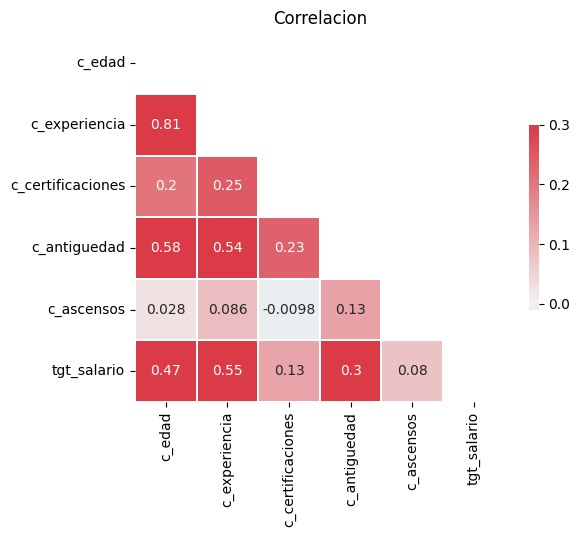

In [128]:
corr = df[["c_edad","c_experiencia","c_certificaciones","c_antiguedad","c_ascensos","tgt_salario"]].corr()


mask = np.triu(np.ones_like(corr, dtype=np.bool))

g = sns.heatmap(corr, mask=mask, vmax=0.3, center=0, cmap=cmap, square=True, annot=True, linewidths=0.05, cbar_kws={"shrink": .5})
p = plt.title('Correlacion')

**Insight:**
- Los años de experiencia tienen una correlacion positiva y un poco alta con el salario percibido
- La edad tiene una correlacion positiva y un poco alta con el salario percibido
- Las certificaciones no parecen impactar mucho al salario percibido al igual que los ascensos

##  <h1 style="color:#434b4d"> Variables Categoricas</h1>  

In [129]:
df.filter(like="v_")

,v_genero,v_puesto,v_estudios,v_sector,v_python,v_r,v_sql,v_azure,v_gcp,v_aws,v_excel,v_tableau,v_power bi,v_looker,v_vba,v_tensorflow,v_pytorch,v_inglés,v_gestión de proyectos,v_liderazgo,v_comunicación,v_administración del tiempo,v_resolución de problemas,v_trabajo en equipo,v_solución de conflictos,v_confianza,v_iniciativas_en_tu_empresa,v_importante_m_industria,v_trato_dif_pares,v_sesgo_genero_reclutamiento
0,Ella,Data Scientist,Licenciatura,Finanzas y económico,Medio,Bajo,Alto,Medio,Alto,Nulo,Alto,Medio,Medio,Medio,Bajo,Bajo,Bajo,Medio,Alto,Alto,Alto,Alto,Alto,Alto,Alto,No,Si,Si,No,No
1,Ella,Especialista de datos JR,Licenciatura,Finanzas y económico,Bajo,Medio,Medio,Medio,Bajo,Bajo,Alto,Nulo,Nulo,Nulo,Nulo,Nulo,Nulo,Alto,Medio,Medio,Medio,Alto,Alto,Alto,Alto,Sí,Si,Si,No,No
2,Ella,Data Analyst,Licenciatura,Finanzas y económico,Medio,Nulo,Medio,Bajo,Nulo,Bajo,Medio,Bajo,Nulo,Nulo,Nulo,Bajo,Bajo,Medio,Bajo,Bajo,Medio,Bajo,Medio,Medio,Medio,Sí,Si,Si,No,No
3,Ella,Data Analyst,Licenciatura,Finanzas y económico,Medio,Medio,Medio,Nulo,Nulo,Nulo,Alto,Bajo,Bajo,Nulo,Medio,Nulo,Nulo,Medio,Bajo,Medio,Alto,Medio,Alto,Medio,Alto,Sí,Si,Si,Si,No
4,Ella,Data Engineer,"Licenciatura, Diplomado",Informática y tecnología,Medio,Medio,Alto,Nulo,Nulo,Medio,Medio,Bajo,Bajo,Bajo,Alto,Bajo,Nulo,Medio,Nulo,Medio,Medio,Medio,Medio,Medio,Medio,Sí,Si,Si,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86,El,Fullstack,Licenciatura,Informática y tecnología,Bajo,Nulo,Medio,Bajo,Bajo,Nulo,Bajo,Nulo,Nulo,Nulo,Bajo,Nulo,Nulo,Bajo,Medio,Bajo,Medio,Medio,Medio,Nulo,Medio,Sí,Si,NaN,No,No
87,El,Data Engineer,Maestria,Informática y tecnología,Medio,Nulo,Alto,Bajo,Medio,Nulo,Medio,Bajo,Nulo,Bajo,Bajo,Nulo,Nulo,Medio,Bajo,Bajo,Medio,Medio,Medio,Alto,Medio,No,Si,NaN,No,No
88,El,Data Scientist,Maestria,Finanzas y económico,Bajo,Medio,Bajo,Nulo,Nulo,Nulo,Alto,Bajo,Medio,Nulo,Alto,Nulo,Nulo,Alto,Medio,Medio,Medio,Alto,Alto,Bajo,Medio,Sí,Si,NaN,Si,Si
89,El,Android engineer,Maestria,Informática y tecnología,Medio,Nulo,Medio,Nulo,Nulo,Nulo,Bajo,Nulo,Nulo,Nulo,Nulo,Bajo,Nulo,Medio,Bajo,Bajo,Bajo,Bajo,Bajo,Alto,Bajo,Sí,Si,NaN,Si,No


####  <h1 style="color:#9da5f3"> Puesto </h1>  

In [130]:
catalogo={"Head data scientist":"Data Scientist","Analista de investigación y desarrollo":"Data Analyst",
"Analista financiero":"Data Analyst",
"Analista BI":"Data Analyst",
 "Information Security Analyst":"Data Analyst",
"Especialista en datos Jr":"Data Analyst",
"Coordinador analitico de negocio":"Data Analyst",
"Analyst planner":"Data Analyst",
"Especialista de datos JR":"Data Analyst",
"Risk Analyst":"Data Analyst",
"Analytics Manager":"Data Analyst",
"Análisis Cuantitativo":"Data Analyst"}

In [131]:
df["v_puesto"]=df["v_puesto"].map(lambda x:x.strip().lstrip()).replace(catalogo)


In [132]:
df["v_puesto"]=df["v_puesto"].map(lambda x:"Otro" if x not in ["Data Analyst","Data Scientist","Data Engineer"] else x)

In [133]:
df["v_puesto"].value_counts()

v_puesto
Data Analyst      48
Data Scientist    47
Otro              33
Data Engineer      7
Name: count, dtype: int64

In [134]:
aux=pd.DataFrame(df["v_puesto"].value_counts())
aux=aux.reset_index()
aux.columns=["v_puesto","conteo"]

fig = px.bar(aux, x='v_puesto', y='conteo',color_discrete_sequence=['indianred'])
fig.show()

####  <h1 style="color:#9da5f3"> v_genero </h1>  

In [135]:
df["v_genero"].value_counts()

v_genero
El      91
Ella    44
Name: count, dtype: int64

In [136]:
aux=pd.DataFrame(df["v_genero"].value_counts()[:15])
aux=aux.reset_index()
aux.columns=["v_genero","conteo"]

fig = px.bar(aux, x='v_genero', y='conteo',color_discrete_sequence=['indianred'],title="Genero")
fig.show()

####  <h1 style="color:#9da5f3"> Estudios </h1>  

In [137]:
df["v_estudios"].value_counts()

v_estudios
Licenciatura                                              61
Licenciatura, Diplomado                                   36
Maestria                                                  17
Diplomado                                                 10
Licenciatura, Maestria, Diplomado                          3
Licenciatura, Diplomado, Seminario                         1
Licenciatura, Maestria, Doctorado                          1
Doctorado                                                  1
Licenciatura, Diplomado en ciencia de datos en proceso     1
Licenciatura, Diplomado, Certificaciones Microsoft         1
Licenciatura, Maestria                                     1
Licenciatura, Maestria, Diplomado, Especialización         1
Licenciatura, egresado no titulado                         1
Name: count, dtype: int64

In [138]:
df["v_estudios"]=df["v_estudios"].replace(dict(zip(['Licenciatura', 'Licenciatura, Diplomado', 'Maestria', 'Diplomado',
       'Licenciatura, Maestria, Diplomado',
       'Licenciatura, Diplomado, Seminario',
       'Licenciatura, Maestria, Doctorado', 'Doctorado',
       'Licenciatura, Diplomado en ciencia de datos en proceso',
       'Licenciatura, Diplomado, Certificaciones Microsoft',
       'Licenciatura, Maestria',
       'Licenciatura, Maestria, Diplomado, Especialización',
       'Licenciatura, egresado no titulado'],
        ['Licenciatura', 'Diplomado', 'Maestria', 'Diplomado',
       'Maestria',
       'Diplomado',
       'Doctorado', 'Doctorado',
       'Diplomado',
       'Diplomado',
       'Maestria',
       'Maestria',
       'Licenciatura'])))

In [139]:
df["v_estudios"].value_counts()

v_estudios
Licenciatura    62
Diplomado       49
Maestria        22
Doctorado        2
Name: count, dtype: int64

In [140]:
aux=pd.DataFrame(df["v_estudios"].value_counts())
aux=aux.reset_index()
aux.columns=["v_estudios","conteo"]

fig = px.bar(aux, x='v_estudios', y='conteo',color_discrete_sequence=['indianred'],title="v_estudios")
fig.show()

####  <h1 style="color:#9da5f3"> Sector </h1>  

In [141]:
df.filter(like="v_")

,v_genero,v_puesto,v_estudios,v_sector,v_python,v_r,v_sql,v_azure,v_gcp,v_aws,v_excel,v_tableau,v_power bi,v_looker,v_vba,v_tensorflow,v_pytorch,v_inglés,v_gestión de proyectos,v_liderazgo,v_comunicación,v_administración del tiempo,v_resolución de problemas,v_trabajo en equipo,v_solución de conflictos,v_confianza,v_iniciativas_en_tu_empresa,v_importante_m_industria,v_trato_dif_pares,v_sesgo_genero_reclutamiento
0,Ella,Data Scientist,Licenciatura,Finanzas y económico,Medio,Bajo,Alto,Medio,Alto,Nulo,Alto,Medio,Medio,Medio,Bajo,Bajo,Bajo,Medio,Alto,Alto,Alto,Alto,Alto,Alto,Alto,No,Si,Si,No,No
1,Ella,Data Analyst,Licenciatura,Finanzas y económico,Bajo,Medio,Medio,Medio,Bajo,Bajo,Alto,Nulo,Nulo,Nulo,Nulo,Nulo,Nulo,Alto,Medio,Medio,Medio,Alto,Alto,Alto,Alto,Sí,Si,Si,No,No
2,Ella,Data Analyst,Licenciatura,Finanzas y económico,Medio,Nulo,Medio,Bajo,Nulo,Bajo,Medio,Bajo,Nulo,Nulo,Nulo,Bajo,Bajo,Medio,Bajo,Bajo,Medio,Bajo,Medio,Medio,Medio,Sí,Si,Si,No,No
3,Ella,Data Analyst,Licenciatura,Finanzas y económico,Medio,Medio,Medio,Nulo,Nulo,Nulo,Alto,Bajo,Bajo,Nulo,Medio,Nulo,Nulo,Medio,Bajo,Medio,Alto,Medio,Alto,Medio,Alto,Sí,Si,Si,Si,No
4,Ella,Data Engineer,Diplomado,Informática y tecnología,Medio,Medio,Alto,Nulo,Nulo,Medio,Medio,Bajo,Bajo,Bajo,Alto,Bajo,Nulo,Medio,Nulo,Medio,Medio,Medio,Medio,Medio,Medio,Sí,Si,Si,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86,El,Otro,Licenciatura,Informática y tecnología,Bajo,Nulo,Medio,Bajo,Bajo,Nulo,Bajo,Nulo,Nulo,Nulo,Bajo,Nulo,Nulo,Bajo,Medio,Bajo,Medio,Medio,Medio,Nulo,Medio,Sí,Si,NaN,No,No
87,El,Data Engineer,Maestria,Informática y tecnología,Medio,Nulo,Alto,Bajo,Medio,Nulo,Medio,Bajo,Nulo,Bajo,Bajo,Nulo,Nulo,Medio,Bajo,Bajo,Medio,Medio,Medio,Alto,Medio,No,Si,NaN,No,No
88,El,Data Scientist,Maestria,Finanzas y económico,Bajo,Medio,Bajo,Nulo,Nulo,Nulo,Alto,Bajo,Medio,Nulo,Alto,Nulo,Nulo,Alto,Medio,Medio,Medio,Alto,Alto,Bajo,Medio,Sí,Si,NaN,Si,Si
89,El,Otro,Maestria,Informática y tecnología,Medio,Nulo,Medio,Nulo,Nulo,Nulo,Bajo,Nulo,Nulo,Nulo,Nulo,Bajo,Nulo,Medio,Bajo,Bajo,Bajo,Bajo,Bajo,Alto,Bajo,Sí,Si,NaN,Si,No


In [142]:

df['v_sector'].value_counts()

v_sector
Finanzas y económico              66
Informática y tecnología          20
Publicidad y Marketing             6
Educación                          4
Retail                             4
Seguros                            3
Telecomunicación                   3
Entretenimiento                    3
Farmacéutica                       3
Energía                            2
Banca                              2
Logística                          2
Gobierno                           2
Consultoria                        2
Actuarial                          1
Experiencia del cliente            1
Manufactura                        1
Alimentos y bebidas                1
Minería                            1
Aeroespacial                       1
Investigación de mercados FMCG     1
Bancario                           1
Sector público                     1
Mercados                           1
Transporte                         1
Medios y noticias                  1
Informacion de mercado       

In [143]:
aux=pd.DataFrame(df["v_sector"].value_counts())
aux=aux.reset_index()
aux.columns=["v_sector","conteo"]

fig = px.bar(aux, x='v_sector', y='conteo',color_discrete_sequence=['indianred'],title="v_sector")
fig.show()

***
#  <h1 style="color:#6a2016;text-align: center"> Feature Engineering </h1>
***

- Creación de nuevas funciones a partir de funciones existentes
- Eliminar columnas
- Manejo de características categóricas ordinales y nominales
- Selección de características

In [144]:
df

,c_edad,v_genero,v_puesto,c_experiencia,tgt_salario,v_estudios,v_sector,c_certificaciones,c_antiguedad,v_python,v_r,v_sql,v_azure,v_gcp,v_aws,v_excel,v_tableau,v_power bi,v_looker,v_vba,v_tensorflow,v_pytorch,v_inglés,v_gestión de proyectos,v_liderazgo,v_comunicación,v_administración del tiempo,v_resolución de problemas,v_trabajo en equipo,v_solución de conflictos,t_porque_area_tech,c_ascensos,v_confianza,v_iniciativas_en_tu_empresa,v_importante_m_industria,t_importante_m_industria_porque,v_trato_dif_pares,t_trato_dif_pares_porque,t_consejo_mujeres,v_sesgo_genero_reclutamiento,t_sesgo_genero_reclutamiento_exp,t_como_combatir_sesgo,t_algo_desearias_saber_comenzar
0,34,Ella,Data Scientist,9.0,85.5,Licenciatura,Finanzas y económico,3,0,Medio,Bajo,Alto,Medio,Alto,Nulo,Alto,Medio,Medio,Medio,Bajo,Bajo,Bajo,Medio,Alto,Alto,Alto,Alto,Alto,Alto,Alto,Por un profesor,0.0,No,Si,Si,Son un buen complemento en el trabajo porque t...,No,NaN,Que desarrollen fuertemente sus habilidades té...,No,NaN,Fortaleciendo técnicamente a las mujeres en pr...,Que debí empezar a programar en la infancia
1,28,Ella,Data Analyst,0.5,35.5,Licenciatura,Finanzas y económico,2,0,Bajo,Medio,Medio,Medio,Bajo,Bajo,Alto,Nulo,Nulo,Nulo,Nulo,Nulo,Nulo,Alto,Medio,Medio,Medio,Alto,Alto,Alto,Alto,Coincidencia,1.0,Sí,Si,Si,"Porque las mujeres hacen gran equipo, son más ...",No,NaN,Es una posición como cualquier otra,No,NaN,No teniendo prejuicios y dando oportunidades,Todo error se puede remediar
2,23,Ella,Data Analyst,1.0,35.5,Licenciatura,Finanzas y económico,3,2,Medio,Nulo,Medio,Bajo,Nulo,Bajo,Medio,Bajo,Nulo,Nulo,Nulo,Bajo,Bajo,Medio,Bajo,Bajo,Medio,Bajo,Medio,Medio,Medio,Es una área donde puedes encontrar muchas resp...,1.0,Sí,Si,Si,"Porque damos ideas maravillosas, y somos muy b...",No,NaN,Certifíquense y no tengan miedo,No,NaN,Creo que todo se basa en los heads que liderea...,Más manejo de datos
3,33,Ella,Data Analyst,3.0,55.5,Licenciatura,Finanzas y económico,3,7,Medio,Medio,Medio,Nulo,Nulo,Nulo,Alto,Bajo,Bajo,Nulo,Medio,Nulo,Nulo,Medio,Bajo,Medio,Alto,Medio,Alto,Medio,Alto,"Me gusta mucho la parte de la programación, la...",7.0,Sí,Si,Si,Por qué tenemos claramente la capacidad de hac...,Si,"Aplican la de ""mansplaining"" lo cual resulta i...",Que confíen en sus habilidades y levanten la v...,No,NaN,Demostrando las habilidades y ampliando el lug...,Tener una formación más práctica.
4,24,Ella,Data Engineer,1.0,25.5,Diplomado,Informática y tecnología,2,0,Medio,Medio,Alto,Nulo,Nulo,Medio,Medio,Bajo,Bajo,Bajo,Alto,Bajo,Nulo,Medio,Nulo,Medio,Medio,Medio,Medio,Medio,Medio,Me llamo la atención los proyectos que manejan,0.0,Sí,Si,Si,Es un sector donde predominan los hombres pero...,No,NaN,Que no tengan miedo.,No,NaN,Dando a conocer la oferta y campo laboral que ...,Tener confianza en mis conocimientos
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86,24,El,Otro,2.0,15.5,Licenciatura,Informática y tecnología,2,2,Bajo,Nulo,Medio,Bajo,Bajo,Nulo,Bajo,Nulo,Nulo,Nulo,Bajo,Nulo,Nulo,Bajo,Medio,Bajo,Medio,Medio,Medio,Nulo,Medio,Por elección propia,1.0,Sí,Si,NaN,NaN,No,NaN,NaN,No,NaN,NaN,Finanzas e impuestos\n
87,50,El,Data Engineer,24.0,35.5,Maestria,Informática y tecnología,3,0,Medio,Nulo,Alto,Bajo,Medio,Nulo,Medio,Bajo,Nulo,Bajo,Bajo,Nulo,Nulo,Medio,Bajo,Bajo,Medio,Medio,Medio,Alto,Medio,Siempre me gustaron las computadoras y me sigu...,1.0,No,Si,NaN,NaN,No,-,NaN,No,-,NaN,"Sobre los horarios, sobre la ergonomia y riesg..."
88,37,El,Data Scientist,12.0,75.5,Maestria,Finanzas y económico,4,10,Bajo,Medio,Bajo,Nulo,Nulo,Nulo,Alto,Bajo,Medio,Nulo,Alto,Nulo,Nulo,Alto,Medio,Medio,Medio,Alto,Alto,Bajo,Medio,Siempre deseé dedicarme a esta área. desde niñ...,7.0,Sí,Si,NaN,NaN,Si,"Por amistad y compadrazgo, existe una gran dif...",NaN,Si,"Por la discriminación positiva actual, dan pre...",NaN,Lo difícil que es encontrar pares realmente ca...
89,35,El,Otro,6.0,75.5,

In [145]:
cols_ordinales=["v_"+x.lower() for x in tec_features]+["v_"+x.lower() for x in hab_features]

In [146]:
dictio_ordinales=dict(zip(['Medio', 'Alto', 'Bajo', 'Nulo'],[2, 3, 1, 0]))

In [147]:
X=df[['c_edad', 'v_genero', 'v_puesto', 'c_experiencia', 'tgt_salario',
       'v_estudios', 'v_sector', 'c_certificaciones', 'c_antiguedad',
       'v_python', 'v_r', 'v_sql', 'v_azure', 'v_gcp', 'v_aws', 'v_excel',
       'v_tableau', 'v_power bi', 'v_looker', 'v_vba', 'v_tensorflow',
       'v_pytorch', 'v_inglés', 'v_gestión de proyectos', 'v_liderazgo',
       'v_comunicación', 'v_administración del tiempo',
       'v_resolución de problemas', 'v_trabajo en equipo',
       'v_solución de conflictos', 'c_ascensos']]

In [148]:
df[["v_genero","tgt_salario"]].groupby(['v_genero']).describe(percentiles=np.arange(0.1,1.1,.1))

tgt_salario                                                       
               count       mean        std   min   10%   20%   30%   40%   
v_genero                                                                   
El              91.0  40.027473  21.735450   7.5  15.5  25.5  25.5  25.5  \
Ella            44.0  38.227273  18.722407  15.5  15.5  25.5  25.5  25.5   

                                                    
           50%   60%   70%   80%   90%  100%   max  
v_genero                                            
El        35.5  35.5  45.5  65.5  75.5  95.5  95.5  
Ella      35.5  35.5  45.5  55.5  65.5  85.5  85.5

In [149]:
for col in cols_ordinales:
    X[col]=X[col].replace(dictio_ordinales)

In [150]:
X["v_estudios"]=X["v_estudios"].replace(dict(zip(['Licenciatura', 'Diplomado', 'Maestria', 'Doctorado'],[1, 2, 3, 4])))

In [151]:
X["v_puesto"].value_counts()

v_puesto
Data Analyst      48
Data Scientist    47
Otro              33
Data Engineer      7
Name: count, dtype: int64

In [152]:
X["v_Data Analyst"]=X["v_puesto"].map(lambda x:1 if x=="Data Analyst" else 0)
X["v_Data Scientist"]=X["v_puesto"].map(lambda x:1 if x=="Data Scientist" else 0)
X["v_Data Engineer"]=X["v_puesto"].map(lambda x:1 if x=="Data Engineer" else 0)

In [153]:
X=X.drop(columns=["v_puesto"])

In [154]:
X["v_Data Scientist"].value_counts()

v_Data Scientist
0    88
1    47
Name: count, dtype: int64

In [155]:
X["v_genero"]=X["v_genero"].map(lambda x:1 if x=="Ella" else 0)

In [156]:
X

,c_edad,v_genero,c_experiencia,tgt_salario,v_estudios,v_sector,c_certificaciones,c_antiguedad,v_python,v_r,v_sql,v_azure,v_gcp,v_aws,v_excel,v_tableau,v_power bi,v_looker,v_vba,v_tensorflow,v_pytorch,v_inglés,v_gestión de proyectos,v_liderazgo,v_comunicación,v_administración del tiempo,v_resolución de problemas,v_trabajo en equipo,v_solución de conflictos,c_ascensos,v_Data Analyst,v_Data Scientist,v_Data Engineer
0,34,1,9.0,85.5,1,Finanzas y económico,3,0,2,1,3,2,3,0,3,2,2,2,1,1,1,2,3,3,3,3,3,3,3,0.0,0,1,0
1,28,1,0.5,35.5,1,Finanzas y económico,2,0,1,2,2,2,1,1,3,0,0,0,0,0,0,3,2,2,2,3,3,3,3,1.0,1,0,0
2,23,1,1.0,35.5,1,Finanzas y económico,3,2,2,0,2,1,0,1,2,1,0,0,0,1,1,2,1,1,2,1,2,2,2,1.0,1,0,0
3,33,1,3.0,55.5,1,Finanzas y económico,3,7,2,2,2,0,0,0,3,1,1,0,2,0,0,2,1,2,3,2,3,2,3,7.0,1,0,0
4,24,1,1.0,25.5,2,Informática y tecnología,2,0,2,2,3,0,0,2,2,1,1,1,3,1,0,2,0,2,2,2,2,2,2,0.0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86,24,0,2.0,15.5,1,Informática y tecnología,2,2,1,0,2,1,1,0,1,0,0,0,1,0,0,1,2,1,2,2,2,0,2,1.0,0,0,0
87,50,0,24.0,35.5,3,Informática y tecnología,3,0,2,0,3,1,2,0,2,1,0,1,1,0,0,2,1,1,2,2,2,3,2,1.0,0,0,1
88,37,0,12.0,75.5,3,Finanzas y económico,4,10,1,2,1,0,0,0,3,1,2,0,3,0,0,3,2,2,2,3,3,1,2,7.0,0,1,0
89,35,0,6.0,75.5,3,Informática y tecnología,3,2,2,0,2,0,0,0,1,0,0,0,0,1,0,2,1,1,1,1,1,3,1,1.0,0,0,0


In [157]:
X.groupby(["v_sector"]).agg({"tgt_salario":[min,np.mean,max]})

tgt_salario                 
                                       min       mean   max
v_sector                                                   
Actuarial                             35.5  35.500000  35.5
Aeroespacial                          35.5  35.500000  35.5
Alimentos y bebidas                   55.5  55.500000  55.5
Banca                                 15.5  25.500000  35.5
Bancario                              25.5  25.500000  25.5
Consultoria                           45.5  55.500000  65.5
Educación                             15.5  23.000000  25.5
Energía                               75.5  80.500000  85.5
Entretenimiento                       15.5  25.500000  45.5
Experiencia del cliente               25.5  25.500000  25.5
Farmacéutica                          25.5  32.166667  45.5
Finanzas y económico                  15.5  43.075758  95.5
Gobierno                              45.5  45.500000  45.5
Informacion de mercado                25.5  25.500000  25.5
Informática y tecnología               7.5  28.100000  75.5
Investigación de mercados FMCG        65.5  65.500000  65.5
Logística                             65.5  70.500000  75.5
Manufactura                           65.5  65.500000  65.5
Medios y noticias                     35.5  35.500000  35.5
Mercados                              25.5  25.500000  25.5
Minería                               95.5  95.500000  95.5
Publicidad y Marketing                25.5  33.833333  45.5
Retail                                15.5  33.000000  65.5
Sector público                        55.5  55.500000  55.5
Seguros                               15.5  22.166667  25.5
Telecomunicación                      25.5  45.500000  75.5
Transporte                            15.5  15.500000  15.5

In [158]:
X

,c_edad,v_genero,c_experiencia,tgt_salario,v_estudios,v_sector,c_certificaciones,c_antiguedad,v_python,v_r,v_sql,v_azure,v_gcp,v_aws,v_excel,v_tableau,v_power bi,v_looker,v_vba,v_tensorflow,v_pytorch,v_inglés,v_gestión de proyectos,v_liderazgo,v_comunicación,v_administración del tiempo,v_resolución de problemas,v_trabajo en equipo,v_solución de conflictos,c_ascensos,v_Data Analyst,v_Data Scientist,v_Data Engineer
0,34,1,9.0,85.5,1,Finanzas y económico,3,0,2,1,3,2,3,0,3,2,2,2,1,1,1,2,3,3,3,3,3,3,3,0.0,0,1,0
1,28,1,0.5,35.5,1,Finanzas y económico,2,0,1,2,2,2,1,1,3,0,0,0,0,0,0,3,2,2,2,3,3,3,3,1.0,1,0,0
2,23,1,1.0,35.5,1,Finanzas y económico,3,2,2,0,2,1,0,1,2,1,0,0,0,1,1,2,1,1,2,1,2,2,2,1.0,1,0,0
3,33,1,3.0,55.5,1,Finanzas y económico,3,7,2,2,2,0,0,0,3,1,1,0,2,0,0,2,1,2,3,2,3,2,3,7.0,1,0,0
4,24,1,1.0,25.5,2,Informática y tecnología,2,0,2,2,3,0,0,2,2,1,1,1,3,1,0,2,0,2,2,2,2,2,2,0.0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86,24,0,2.0,15.5,1,Informática y tecnología,2,2,1,0,2,1,1,0,1,0,0,0,1,0,0,1,2,1,2,2,2,0,2,1.0,0,0,0
87,50,0,24.0,35.5,3,Informática y tecnología,3,0,2,0,3,1,2,0,2,1,0,1,1,0,0,2,1,1,2,2,2,3,2,1.0,0,0,1
88,37,0,12.0,75.5,3,Finanzas y económico,4,10,1,2,1,0,0,0,3,1,2,0,3,0,0,3,2,2,2,3,3,1,2,7.0,0,1,0
89,35,0,6.0,75.5,3,Informática y tecnología,3,2,2,0,2,0,0,0,1,0,0,0,0,1,0,2,1,1,1,1,1,3,1,1.0,0,0,0


In [159]:
X=X.drop(columns=["v_sector"])

In [160]:
y=X["tgt_salario"]
X=X.drop(columns=["tgt_salario"])

***
#  <h1 style="color:#6a2016;text-align: center"> Missings</h1>
***

In [161]:
from sklearn.model_selection import train_test_split

In [162]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.3,random_state=413)

In [163]:
completitud(X)

,columna,total,completitud
0,c_edad,0,100.0
1,v_Data Analyst,0,100.0
2,c_ascensos,0,100.0
3,v_solución de conflictos,0,100.0
4,v_trabajo en equipo,0,100.0
5,v_resolución de problemas,0,100.0
6,v_administración del tiempo,0,100.0
7,v_comunicación,0,100.0
8,v_liderazgo,0,100.0
9,v_gestión de proyectos,0,100.0


In [164]:
completitud(X_train)

,columna,total,completitud
0,c_edad,0,100.0
1,v_Data Analyst,0,100.0
2,c_ascensos,0,100.0
3,v_solución de conflictos,0,100.0
4,v_trabajo en equipo,0,100.0
5,v_resolución de problemas,0,100.0
6,v_administración del tiempo,0,100.0
7,v_comunicación,0,100.0
8,v_liderazgo,0,100.0
9,v_gestión de proyectos,0,100.0


In [165]:
completitud(X_test)

,columna,total,completitud
0,c_edad,0,100.0
1,v_Data Analyst,0,100.0
2,c_ascensos,0,100.0
3,v_solución de conflictos,0,100.0
4,v_trabajo en equipo,0,100.0
5,v_resolución de problemas,0,100.0
6,v_administración del tiempo,0,100.0
7,v_comunicación,0,100.0
8,v_liderazgo,0,100.0
9,v_gestión de proyectos,0,100.0


In [166]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_regression

In [167]:
fs = SelectKBest(score_func=mutual_info_regression, k='all')
fs.fit(X_train, y_train)

SelectKBest(k='all',
            score_func=<function mutual_info_regression at 0x7fa0fb058430>)

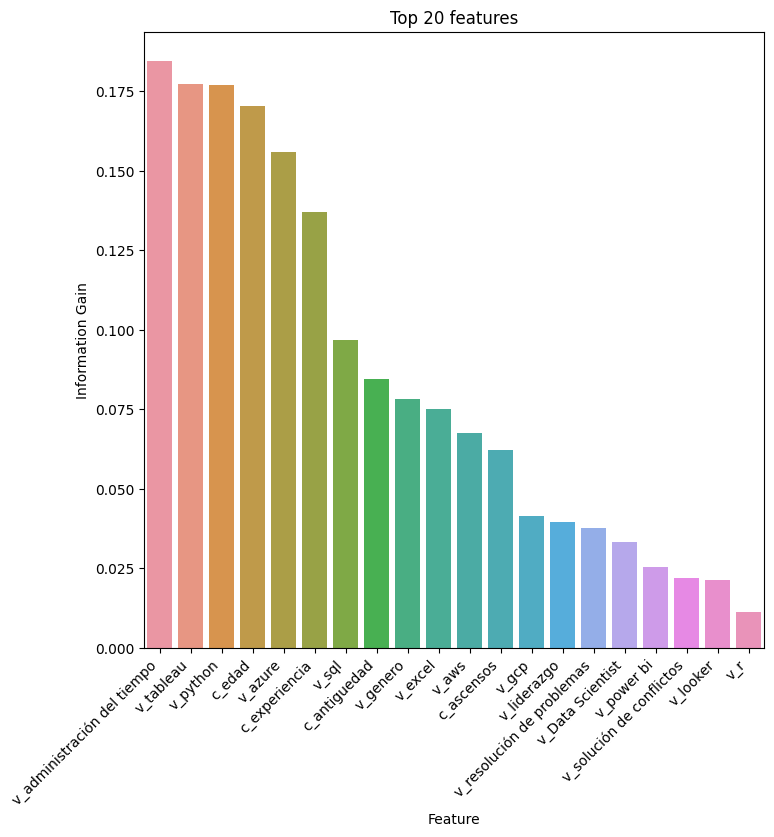

In [168]:
feature_imp = pd.DataFrame(fs.scores_, columns=['Score'], index=X_train.columns)
top20_feature = feature_imp.nlargest(n=20, columns=['Score'])

plt.figure(figsize=(8,8))
g = sns.barplot(x=top20_feature.index, y=top20_feature['Score'])
p = plt.title('Top 20 features')
p = plt.xlabel('Feature')
p = plt.ylabel('Information Gain')
p = g.set_xticklabels(g.get_xticklabels(), rotation=45, horizontalalignment='right')

In [169]:
X_train[X_train.columns[:6]].corr()

,c_edad,v_genero,c_experiencia,v_estudios,c_certificaciones,c_antiguedad
c_edad,1.000000,-0.072171,0.851061,0.332654,0.250259,0.565561
v_genero,-0.072171,1.000000,-0.171947,-0.046842,-0.082897,-0.071989
c_experiencia,0.851061,-0.171947,1.000000,0.279107,0.226649,0.518794
v_estudios,0.332654,-0.046842,0.279107,1.000000,-0.055894,-0.103325
c_certificaciones,0.250259,-0.082897,0.226649,-0.055894,1.000000,0.157542
c_antiguedad,0.565561,-0.071989,0.518794,-0.103325,0.157542,1.000000


In [170]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_percentage_error

from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score,StratifiedKFold

In [171]:
def metricas_regresion(y_true,y_pred):
    mae=mean_absolute_error(y_true,y_pred)
    mse=mean_squared_error(y_true,y_pred)
    rmse=np.sqrt(mse)
    r2=r2_score(y_true,y_pred)
    #r2_adj=1-(((n_obs-1)/(n_obs-n_x-1)))*(1-r2)
    mape=mean_absolute_percentage_error(y_true,y_pred)
    print(f"MAE : {mae}")
    print(f"MSE : {mse}")
    print(f"RMSE : {rmse}")
    print(f"MAPE : {mape}")
    print(f"R2 : {r2}")
    #print(f"R2 Adj: {r2_adj}")
    
def grip_search(X_train,y_train,estimator,param_grid):
    grid = GridSearchCV(cv=6,
                  verbose=True,
                  scoring='r2',
                  estimator=estimator,
                  n_jobs=-1,
                  param_grid=param_grid)
    grid.fit(X_train,y_train)
    print(f"Best Score : {grid.best_score_}")
    print(f"Best Params : {grid.best_params_}")
    return grid.best_estimator_

In [172]:
from sklearn.tree import DecisionTreeRegressor

In [207]:
arbol = DecisionTreeRegressor()

param_grid = dict(criterion = ["mse", "mae"],
                 max_depth=range(5,50,5))

In [208]:
model_arbol=grip_search(X_train,y_train,arbol,param_grid)

Fitting 6 folds for each of 18 candidates, totalling 108 fits


/home/carla/envs/diplomado/lib/python3.10/site-packages/sklearn/tree/_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
/home/carla/envs/diplomado/lib/python3.10/site-packages/sklearn/tree/_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
/home/carla/envs/diplomado/lib/python3.10/site-packages/sklearn/tree/_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
/home/carla/envs/diplomado/lib/python3.10/site-packages/sklearn/tree/_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
/home/carla/envs

/home/carla/envs/diplomado/lib/python3.10/site-packages/sklearn/tree/_classes.py:404: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warnings.warn(
/home/carla/envs/diplomado/lib/python3.10/site-packages/sklearn/tree/_classes.py:404: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warnings.warn(
/home/carla/envs/diplomado/lib/python3.10/site-packages/sklearn/tree/_classes.py:404: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warnings.warn(
/home/carla/envs/diplomado/lib/python3.10/site-packages/sklearn/tree/_classes.py:404: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warnings.warn(
/home/carla/

Best Score : -0.0669027382501325
Best Params : {'criterion': 'mse', 'max_depth': 5}


/home/carla/envs/diplomado/lib/python3.10/site-packages/sklearn/tree/_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
/home/carla/envs/diplomado/lib/python3.10/site-packages/sklearn/tree/_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
/home/carla/envs/diplomado/lib/python3.10/site-packages/sklearn/tree/_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
/home/carla/envs/diplomado/lib/python3.10/site-packages/sklearn/tree/_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(


In [209]:
y_pred_train=model_arbol.predict(X_train)
y_pred_test=model_arbol.predict(X_test)

print("TRAIN \n")
metricas_regresion(y_train,y_pred_train)
print("TEST \n")
metricas_regresion(y_test,y_pred_test)

TRAIN 

MAE : 3.5897435897435894
MSE : 29.882705946535737
RMSE : 5.4665076553989875
MAPE : 0.140083349211543
R2 : 0.9204446441137581
TEST 

MAE : 10.550343964978111
MSE : 294.1718381680858
RMSE : 17.15143837023839
MAPE : 0.2416873590946704
R2 : 0.44896048589196325


#### Random Forest

In [210]:
from sklearn.ensemble import RandomForestRegressor

In [211]:
random= RandomForestRegressor()
param_grid = dict(n_estimators = range(150,220,50),
                 criterion=["mse", "mae"],
                  bootstrap=[True,False],
                  oob_score=[True,False])

In [212]:
model_random=grip_search(X_train,y_train,random,param_grid)

/home/carla/envs/diplomado/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/home/carla/envs/diplomado/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/home/carla/envs/diplomado/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/home/carla/envs/diplomado/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/home/carla/envs/diplomado/lib/python3.1

Fitting 6 folds for each of 16 candidates, totalling 96 fits


/home/carla/envs/diplomado/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/home/carla/envs/diplomado/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/home/carla/envs/diplomado/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/home/carla/envs/diplomado/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/home/carla/envs/diplomado/lib/pytho

/home/carla/envs/diplomado/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/home/carla/envs/diplomado/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/home/carla/envs/diplomado/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/home/carla/envs/diplomado/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/home/carla/envs/diplomado/lib/python3.1

Best Score : 0.32349920623474443
Best Params : {'bootstrap': True, 'criterion': 'mae', 'n_estimators': 200, 'oob_score': False}


In [213]:
y_pred_train=model_random.predict(X_train)
y_pred_test=model_random.predict(X_test)

print("TRAIN \n")
metricas_regresion(y_train,y_pred_train)
print("TEST \n")
metricas_regresion(y_test,y_pred_test)

TRAIN 

MAE : 4.524148936170213
MSE : 35.142313297872334
RMSE : 5.928095250404833
MAPE : 0.14410202708996633
R2 : 0.9064422329731436
TEST 

MAE : 11.56170731707317
MSE : 245.63357195121952
RMSE : 15.67270148861451
MAPE : 0.3018086824423767
R2 : 0.5398818426008469


#### SVR

In [214]:
from sklearn.svm import SVR

In [215]:
svr=SVR()

param_grid = dict(kernel=['linear', 'poly', 'rbf', 'sigmoid'],
                 degree=range(2,4),
                 epsilon=np.arange(0.1,1,.5))

In [216]:
svr_m=grip_search(X_train,y_train,svr,param_grid)

Fitting 6 folds for each of 16 candidates, totalling 96 fits
Best Score : 0.02132518814594153
Best Params : {'degree': 2, 'epsilon': 0.1, 'kernel': 'linear'}


In [217]:
y_pred_train=svr_m.predict(X_train)
y_pred_test=svr_m.predict(X_test)

print("TRAIN \n")
metricas_regresion(y_train,y_pred_train)
print("TEST \n")
metricas_regresion(y_test,y_pred_test)

TRAIN 

MAE : 9.215530631888965
MSE : 197.4531543007628
RMSE : 14.051802528528603
MAPE : 0.3036037326609148
R2 : 0.47432953396647537
TEST 

MAE : 9.776946427050223
MSE : 186.04768986392392
RMSE : 13.639929980169397
MAPE : 0.23381971554867004
R2 : 0.6514974741907108


#### Gradient Boosting

In [218]:
from sklearn.ensemble import GradientBoostingRegressor

In [219]:
model=GradientBoostingRegressor()

In [220]:
param_grid = dict(loss=['ls', 'lad', 'huber'],
                 n_estimators=np.arange(50,200,10),
                  criterion=[ 'mse', 'mae'])

In [221]:
svr_m=grip_search(X_train,y_train,model,param_grid)

Fitting 6 folds for each of 90 candidates, totalling 540 fits


/home/carla/envs/diplomado/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:542: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
/home/carla/envs/diplomado/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:542: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
/home/carla/envs/diplomado/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:542: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
/home/carla/envs/diplomado/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:542: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
/home/carla/envs/dip

/home/carla/envs/diplomado/lib/python3.10/site-packages/sklearn/tree/_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
/home/carla/envs/diplomado/lib/python3.10/site-packages/sklearn/tree/_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
/home/carla/envs/diplomado/lib/python3.10/site-packages/sklearn/tree/_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
/home/carla/envs/diplomado/lib/python3.10/site-packages/sklearn/tree/_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
/home/carla/envs

/home/carla/envsIOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [222]:
y_pred_train=svr_m.predict(X_train)
y_pred_test=svr_m.predict(X_test)

print("TRAIN \n")
metricas_regresion(y_train,y_pred_train)
print("TEST \n")
metricas_regresion(y_test,y_pred_test)

TRAIN 

MAE : 5.0351591540875695
MSE : 74.60065360211648
RMSE : 8.637166989361528
MAPE : 0.17441058987943375
R2 : 0.8013941054307148
TEST 

MAE : 12.126553223070502
MSE : 263.7047216925383
RMSE : 16.23898770528934
MAPE : 0.3076611893561711
R2 : 0.5060311598337899


#### AdaBoost

In [223]:
from sklearn.ensemble import AdaBoostRegressor

In [224]:
ada=AdaBoostRegressor()

param_grid={"n_estimators":range(50,200,10),"learning_rate":np.arange(0.1,2,.3)}

In [225]:
model_ada=grip_search(X_train,y_train,ada,param_grid)

Fitting 6 folds for each of 105 candidates, totalling 630 fits
Best Score : 0.30267762696966766
Best Params : {'learning_rate': 1.9000000000000004, 'n_estimators': 100}


In [226]:
y_pred_train=model_ada.predict(X_train)
y_pred_test=model_ada.predict(X_test)

print("TRAIN \n")
metricas_regresion(y_train,y_pred_train)
print("TEST \n")
metricas_regresion(y_test,y_pred_test)

TRAIN 

MAE : 6.154539469446893
MSE : 51.88329794404892
RMSE : 7.203006174094877
MAPE : 0.21920282425189758
R2 : 0.8618734782627929
TEST 

MAE : 10.881101179885333
MSE : 235.16195863117386
RMSE : 15.334991315001579
MAPE : 0.27545855076281683
R2 : 0.5594971557176251


#### XGBOOST

In [227]:
import xgboost as xgb

In [228]:
params={'min_child_weight': [8,9,10,11,12,13,14,15,16],
        'gamma': [0.05,0.2,0.3,0.4,0.5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5,6,7,8,9],
        "lambda":[0.8,0.9,0.91,0.95,0.96,0.97],
        "alpha":[0.8,0.9,0.91,0.92,0.95,0.96,0.97],
    "learning_rate":[0.03,0.04,0.05,0.06,0.07]}

In [229]:
from sklearn.model_selection import cross_val_score, GridSearchCV, KFold, RandomizedSearchCV, train_test_split

In [230]:
xgb_model = xgb.XGBRegressor()

In [231]:
grid = GridSearchCV(cv=2,
                  verbose=True,
                  scoring='r2',
                  estimator=xgb_model,
                  n_jobs=-1,
                  param_grid=params)

random = RandomizedSearchCV(cv=6,
                  verbose=True,
                  scoring='r2',
                  estimator=xgb_model,
                  n_jobs=-1,
                  param_distributions=params,n_iter=100)

In [112]:
X_train=X_train.drop(columns=["v_resolución de problemas","c_antiguedad"])
X_test=X_test.drop(columns=["v_resolución de problemas","c_antiguedad"])

In [113]:
grid.fit(X_train, y_train)

Fitting 2 folds for each of 595350 candidates, totalling 1190700 fits


GridSearchCV(cv=2,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None, gpu_id=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    predictor=None, random_state=None, ...),
             n_jobs=-1,
             param_grid={'alpha': [0.8, 0.9, 0.91, 0.92, 0.95, 0.96, 0.97],
                         'colsample_bytree': [0.6, 0.8, 1.0],
                         'gamma': [0.05, 0.2, 0.3, 0.4, 0.5],
                         'lambda': [0.8, 0.9, 0.91, 0.95, 0.96, 0.97],
                         'learning_rate': [0.03, 0.04, 0.05, 0.06, 0.07],
                         'max_depth': [3, 4, 5, 6, 7, 8, 9],
                         'min_child_weight': [8, 9, 10, 11, 12, 13, 14, 15, 16],
                         'subsample': [0.6, 0.8, 1.0]},
             scoring='r2', verbose=True)

In [235]:
X_train

,c_edad,v_genero,c_experiencia,v_estudios,c_certificaciones,c_antiguedad,v_python,v_r,v_sql,v_azure,v_gcp,v_aws,v_excel,v_tableau,v_power bi,v_looker,v_vba,v_tensorflow,v_pytorch,v_inglés,v_gestión de proyectos,v_liderazgo,v_comunicación,v_administración del tiempo,v_resolución de problemas,v_trabajo en equipo,v_solución de conflictos,c_ascensos,v_Data Analyst,v_Data Scientist,v_Data Engineer
2,25,0,1.0,2,1,0,3,2,3,2,2,0,3,1,2,2,2,2,1,3,3,3,3,3,3,3,3,0.0,1,0,0
4,24,1,1.0,2,2,0,2,2,3,0,0,2,2,1,1,1,3,1,0,2,0,2,2,2,2,2,2,0.0,0,0,1
23,37,1,2.0,3,4,0,2,2,2,1,0,1,2,2,2,1,1,1,1,3,1,1,2,2,2,3,2,0.0,0,0,1
20,25,1,0.0,2,2,1,3,2,2,0,0,1,2,1,1,1,1,0,0,2,0,1,2,2,2,2,2,1.0,0,0,0
7,38,0,13.0,1,2,10,3,2,3,2,0,2,3,2,3,1,3,2,2,2,2,2,2,2,3,3,3,50.0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65,27,0,0.0,1,4,0,2,2,2,0,0,0,2,2,2,0,1,1,1,3,2,2,2,2,2,2,2,0.0,0,0,0
12,35,0,4.0,2,3,5,2,1,3,1,0,0,3,3,1,0,1,0,0,2,2,2,1,2,2,3,3,1.0,0,1,0
26,39,1,0.0,3,1,0,1,1,1,0,0,0,2,0,0,0,0,1,0,2,3,3,2,3,3,3,3,0.0,0,0,0
6,25,1,1.0,2,1,0,2,1,2,1,0,1,3,2,2,0,2,2,0,2,1,1,2,2,2,3,2,0.0,0,1,0


In [241]:
y_pred_train=grid.predict(X_train)
y_pred_test=grid.predict(X_test)

print("TRAIN \n")
metricas_regresion(y_train,y_pred_train)
print("TEST \n")
metricas_regresion(y_test,y_pred_test)

TRAIN 

MAE : 8.422010279716329
MSE : 122.81442583977005
RMSE : 11.082167019124466
MAPE : 0.26757123262732474
R2 : 0.6730367934842241
TEST 

MAE : 10.375768242812738
MSE : 187.2173147526775
RMSE : 13.682737838337674
MAPE : 0.2692172922263268
R2 : 0.6493065454655105


In [152]:
random.best_params_

{'subsample': 0.6,
 'min_child_weight': 13,
 'max_depth': 8,
 'learning_rate': 0.05,
 'lambda': 0.7,
 'gamma': 0.2,
 'colsample_bytree': 0.8,
 'alpha': 0.8}

In [244]:
from matplotlib import pyplot

In [173]:
from xgboost import plot_importance
plot_importance(grid.best_estimator_)
pyplot.show()

NameError: name 'grid' is not defined